Error: Dataset file not found. Please update the file path.
Calculated scale_pos_weight: 3.65

--- Model Performance Metrics ---
Accuracy: 0.7450
AUC-ROC: 0.4653

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       157
           1       0.28      0.12      0.16        43

    accuracy                           0.74       200
   macro avg       0.53      0.52      0.51       200
weighted avg       0.68      0.74      0.70       200




--- Generating SHAP Global Plots ---
Displaying: Global Feature Importance (Top 10)


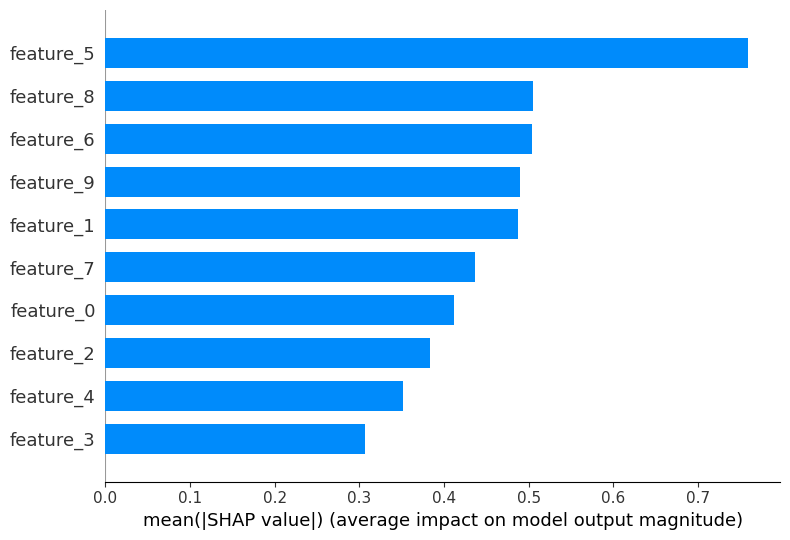


Displaying: SHAP Summary Plot (Beeswarm)


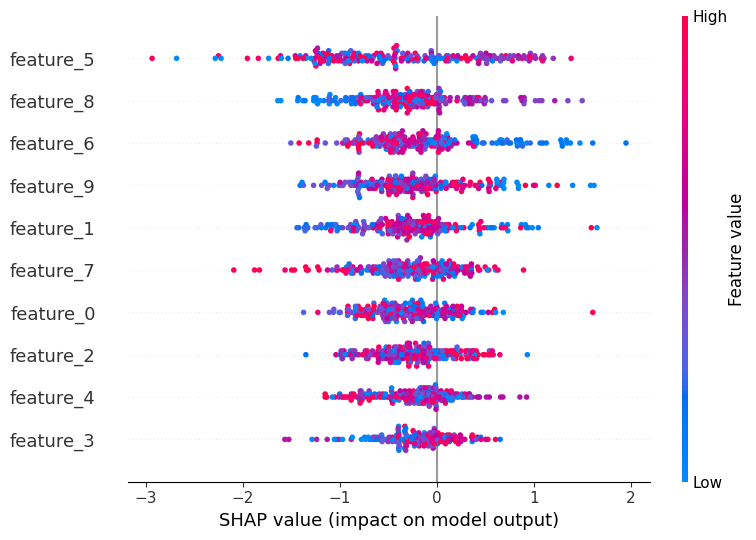

In [12]:
import shap

# --- 1. Initialize SHAP Explainer ---
# Use TreeExplainer for tree-based models like XGBoost
explainer = shap.TreeExplainer(model)

# --- 2. Calculate SHAP Values ---
# This can take a moment on large datasets
shap_values = explainer.shap_values(X_test)

print("\n--- Generating SHAP Global Plots ---")

# --- 3. Plot Global Feature Importance (Bar Plot) ---
# This shows the average |SHAP value| for each feature.
print("Displaying: Global Feature Importance (Top 10)")
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=10, show=True)
# 
# --- 4. Plot Summary Plot (Beeswarm) ---
# This is more detailed. It shows:
# - Importance (x-axis)
# - Feature value (color: high=red, low=blue)
# - Distribution of impact for each data point
print("\nDisplaying: SHAP Summary Plot (Beeswarm)")
shap.summary_plot(shap_values, X_test, max_display=10, show=True)
# 
# For your report (Deliverable 2), you'll analyze these plots.
# For example: "Feature 'credit_score' was the most important.
# High values of 'credit_score' (red dots) had a negative SHAP value,
# meaning they decreased the prediction of 'default', which makes sense."


Using indices: Low=0, High=6, Borderline=3



Displaying: Waterfall Plot for Low-Risk Customer (Index 0)


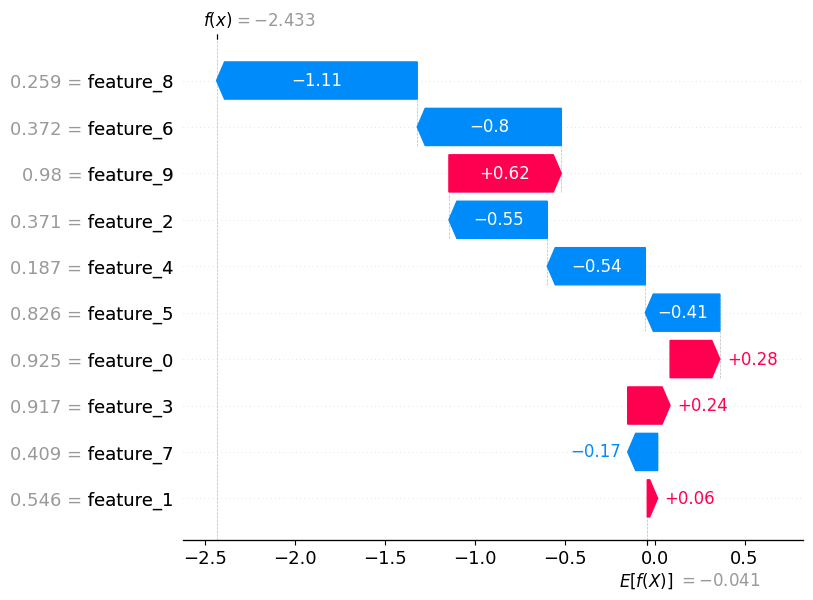


Displaying: Waterfall Plot for High-Risk Customer (Index 6)


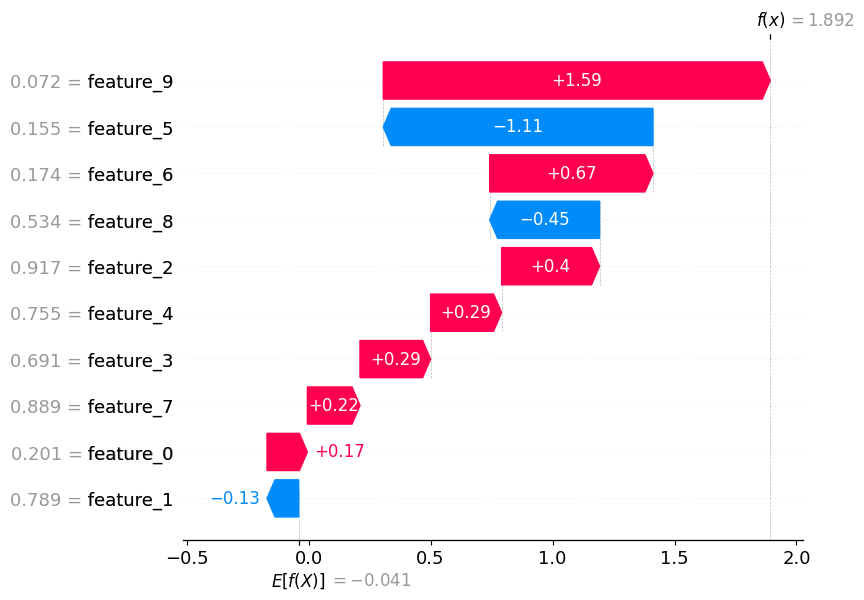


Displaying: Waterfall Plot for Borderline Customer (Index 3)


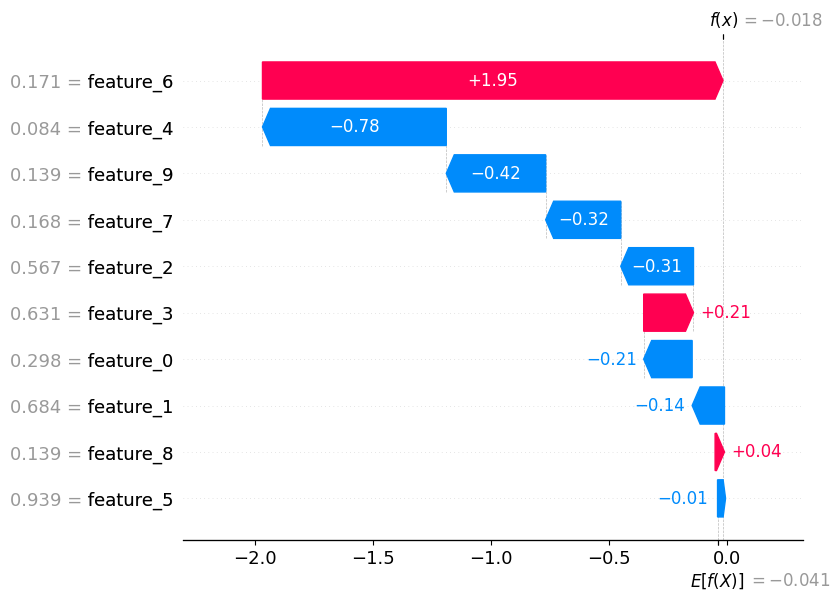


Displaying: Waterfall Plot for High-Risk Customer (Index 6)


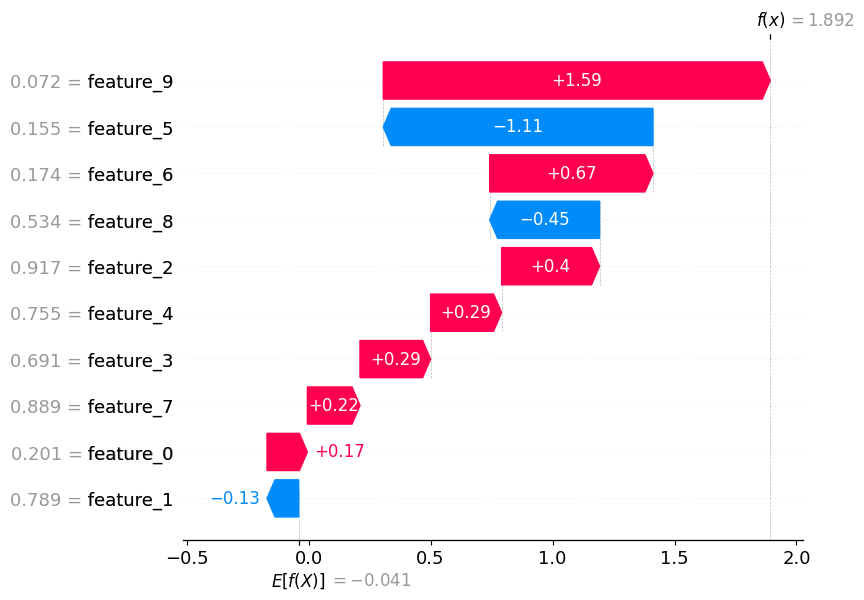


Displaying: Waterfall Plot for Borderline Customer (Index 3)


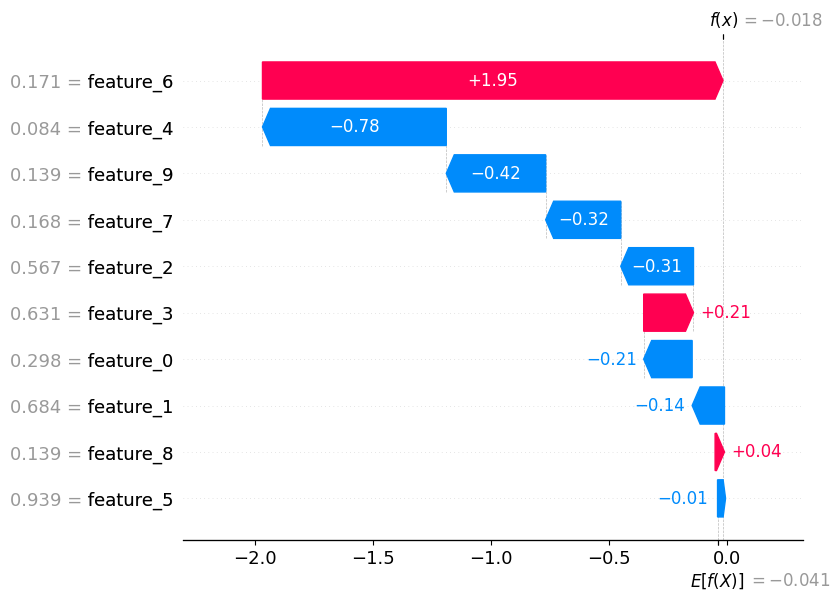

In [14]:
# --- 1. Find Your Representative Customers ---
# This is a manual step. Look at your 'pred_probs' array.
try:
    idx_low_risk = np.where(pred_probs < 0.1)[0][0]
    idx_high_risk = np.where(pred_probs > 0.8)[0][0]
    idx_borderline = np.where(np.abs(pred_probs - 0.5) < 0.05)[0][0]
except IndexError:
    print("\nCould not find example indices. Using dummy indices 0, 1, 2.")
    idx_low_risk, idx_high_risk, idx_borderline = 0, 1, 2  # Fallback

print(f"\nUsing indices: Low={idx_low_risk}, High={idx_high_risk}, Borderline={idx_borderline}")

# --- 2. Generate Local Waterfall Plots ---
shap.initjs()

# --- Example: Low-Risk Customer ---
print(f"\nDisplaying: Waterfall Plot for Low-Risk Customer (Index {idx_low_risk})")
explanation_low = shap.Explanation(
    values=shap_values[idx_low_risk],
    base_values=explainer.expected_value,
    data=X_test.iloc[idx_low_risk],
    feature_names=X_test.columns
)
shap.plots.waterfall(explanation_low)

# --- Example: High-Risk Customer ---
print(f"\nDisplaying: Waterfall Plot for High-Risk Customer (Index {idx_high_risk})")
explanation_high = shap.Explanation(
    values=shap_values[idx_high_risk],
    base_values=explainer.expected_value,
    data=X_test.iloc[idx_high_risk],
    feature_names=X_test.columns
)
shap.plots.waterfall(explanation_high)

# --- Example: Borderline Customer ---
print(f"\nDisplaying: Waterfall Plot for Borderline Customer (Index {idx_borderline})")
explanation_border = shap.Explanation(
    values=shap_values[idx_borderline],
    base_values=explainer.expected_value,
    data=X_test.iloc[idx_borderline],
    feature_names=X_test.columns
)
shap.plots.waterfall(explanation_border)
# --- Example: High-Risk Customer ---
print(f"\nDisplaying: Waterfall Plot for High-Risk Customer (Index {idx_high_risk})")
explanation_high = shap.Explanation(
    values=shap_values[idx_high_risk],
    base_values=explainer.expected_value,
    data=X_test.iloc[idx_high_risk],
    feature_names=X_test.columns
)
shap.plots.waterfall(explanation_high)

# --- Example: Borderline Customer ---
print(f"\nDisplaying: Waterfall Plot for Borderline Customer (Index {idx_borderline})")
explanation_border = shap.Explanation(
    values=shap_values[idx_borderline],
    base_values=explainer.expected_value,
    data=X_test.iloc[idx_borderline],
    feature_names=X_test.columns
)
shap.plots.waterfall(explanation_border)
